<a href="https://colab.research.google.com/github/ErickPol0/PortfolioProject/blob/main/safe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica usando SAFE

**Erick Polo - 190300372**

#Librerias

In [ ]:
pip install safe-transformer

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from SafeTransformer import SafeTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


#Importacion de los datos

In [ ]:
h1 = pd.read_csv('H1.csv')
h1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
h2 = pd.read_csv('H2.csv')
h2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


#Concatenacion de los datos

In [ ]:
print(len(h1))
print(len(h2))

40060
79330


In [ ]:
frame = [h1,h2]
h = pd.concat(frame,ignore_index=True)

In [ ]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

#Preprocesamiento de los datos

Excluimos las variables que estorban y eliminamos aquellos registros con con valores nulos para impedir errores.

In [ ]:
h.drop(columns = ['ArrivalDateYear', 'Agent', 'Company','ReservationStatusDate', 
                  'DistributionChannel', 'ArrivalDateWeekNumber', 
                  'StaysInWeekendNights'], inplace = True)
h.dropna(inplace=True)

In [ ]:
#Variables independientes
x = h.drop(columns = ['IsCanceled'])

Establecemos un constructor para transformar las varuables categoricas a numericas

In [ ]:
ct = make_column_transformer((OneHotEncoder(),['Meal','ReservationStatus', 
                  'Country', 'ArrivalDateMonth', 'MarketSegment', 'DepositType', 
                  'CustomerType', 'ReservedRoomType', 'AssignedRoomType']), 
                  remainder = 'passthrough')

Con el constructor transformamos las variables categoricas y establecemos las variables independientes y tambien la variable dependiente.

In [ ]:
x = ct.fit_transform(x).toarray()
y = h.IsCanceled.values

#Separacion de datos para entrenamiento y prueba

30% de los datos seran para prueba.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

#Estandarizacion de los datos

Como los datos tienen diferentes escalas es importante ajustarlos.

In [ ]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

● Evaluar la regresión logística vainilla en los conjuntos de prueba y train, indicar cuales son las conclusiones de su uso.

● Evualar el modelo lineal, e indicar cuales son los problemas encontrados.

● Implentar el método SAFE para transformar las variables y evaluar su desempeño.

● Usar el modelo de bosque aleatorio supervisor flexible.

● Transformar las variables como se indica en los dos ejemplos posteriores y luego evaluar la
regresión logística basada en variables transformadas y justificar si se puede utilizar para
predecir si se cancelará una reserva.

#Regresion Logistica

In [ ]:
clas = LogisticRegression(random_state = 0)
clas.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [ ]:
clas.score(xtest, ytest)

1.0

Aparentemente nuestro modelo de regresion logistica es muy bueno, tiene una r2 de 1, lo que quiere decir que es 100% preciso.

#Regresion Lineal

Se supone no tendriamos que utilizar un modelo de regresion, pues la variable de respuesta es categorica binaria, por lo que este modelo no tendria valor. Para el modelo lineal hacemos lo mismo excepto estandarizar los datos.

In [ ]:
lm = LinearRegression()

x = h.drop(columns = ['IsCanceled'])
y = h.IsCanceled

x = ct.fit_transform(x).toarray()

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

lm.fit(xtrain, ytrain)
lm.score(xtest, ytest)

0.9999999999995676

#Safe

En la implementacion del codigo de github, se lleva a cabo la separacion para prueba y entrenamiento, despues se lleva a cabo una potenciacion de gradiete de regresion, nosotros como estamos haciendo un trabajo de clasificacion, implementamos uno de clasificacion.

In [ ]:
x = h.drop(columns = ['IsCanceled'])
x = ct.fit_transform(x).toarray()
y = h.IsCanceled.values

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=0)

surrogate_model = GradientBoostingClassifier(learning_rate=0.1)

surrogate_model = surrogate_model.fit(xtrain, ytrain)

In [ ]:
xtrain = pd.DataFrame(xtrain)
ytrain = pd.DataFrame(ytrain)

In [ ]:
rd_clf = RandomForestClassifier()
safe_transformer = SafeTransformer(surrogate_model, penalty = 0.84)
pipe = Pipeline(steps=[('safe', safe_transformer), ('cls', rd_clf)])

pipe = pipe.fit(xtrain, ytrain)

KeyboardInterrupt: ignored

Lamentablemente, aun despues de una hora no se logro compilar, por lo que no se pudo completar el ejercicio. 

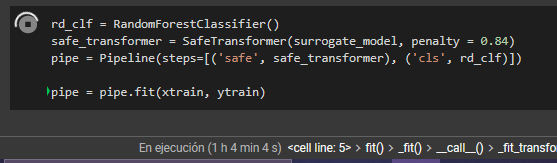